# Real World Economic Data Analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from fredapi import Fred

pd.set_option('display.max_columns', 500)
plt.style.use('Solarize_Light2')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fred_key = '15aeb60f96b45a84dbafe01a4d031ee2'

### 1. Create the FRED Object

In [14]:
fred = Fred(api_key=fred_key)

In [16]:
fred

### 2. Search Economic Data

In [24]:
sp_search = fred.search('S%P', order_by='popularity')

sp_search.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-02-18,2025-02-18,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-02-17,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-02-18 09:18:08-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-02-18,2025-02-18,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-01-28 08:12:01-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-02-18,2025-02-18,S&P 500,2015-02-17,2025-02-14,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-02-14 19:11:32-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-02-18,2025-02-18,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-02-17,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-02-18 09:18:11-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-02-18,2025-02-18,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-02-17,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-02-18 09:25:01-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPISA,CSUSHPISA,2025-02-18,2025-02-18,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2025-01-28 08:12:01-06:00,78,"For more information regarding the index, plea..."
DJIA,DJIA,2025-02-18,2025-02-18,Dow Jones Industrial Average,2015-02-17,2025-02-14,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-02-14 19:01:02-06:00,74,The observations for the Dow Jones Industrial ...
MEHOINUSA646N,MEHOINUSA646N,2025-02-18,2025-02-18,Median Household Income in the United States,1984-01-01,2023-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2024-09-11 09:45:03-05:00,72,Household data are collected as of March. As ...
BAMLHE00EHYIEY,BAMLHE00EHYIEY,2025-02-18,2025-02-18,ICE BofA Euro High Yield Index Effective Yield,1997-12-31,2025-02-17,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-02-18 09:17:05-06:00,68,This data represents the effective yield of th...


### 3. Pull Raw Data

<Axes: title={'center': 'S&P 500'}>

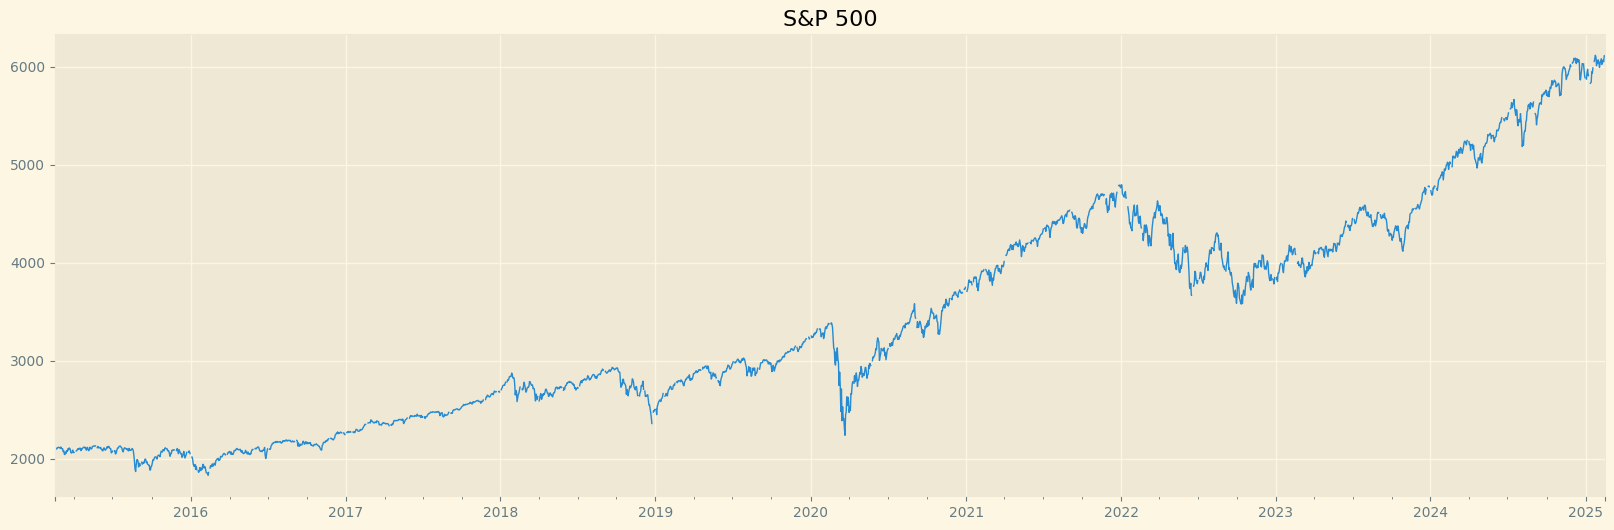

In [36]:
sp500 = fred.get_series(series_id = 'SP500')
sp500.plot(figsize = (20,6), title = 'S&P 500', lw = 1)

### 4. Pull and Join Multiple Data Series

<Axes: title={'center': 'Unemployment Rate'}>

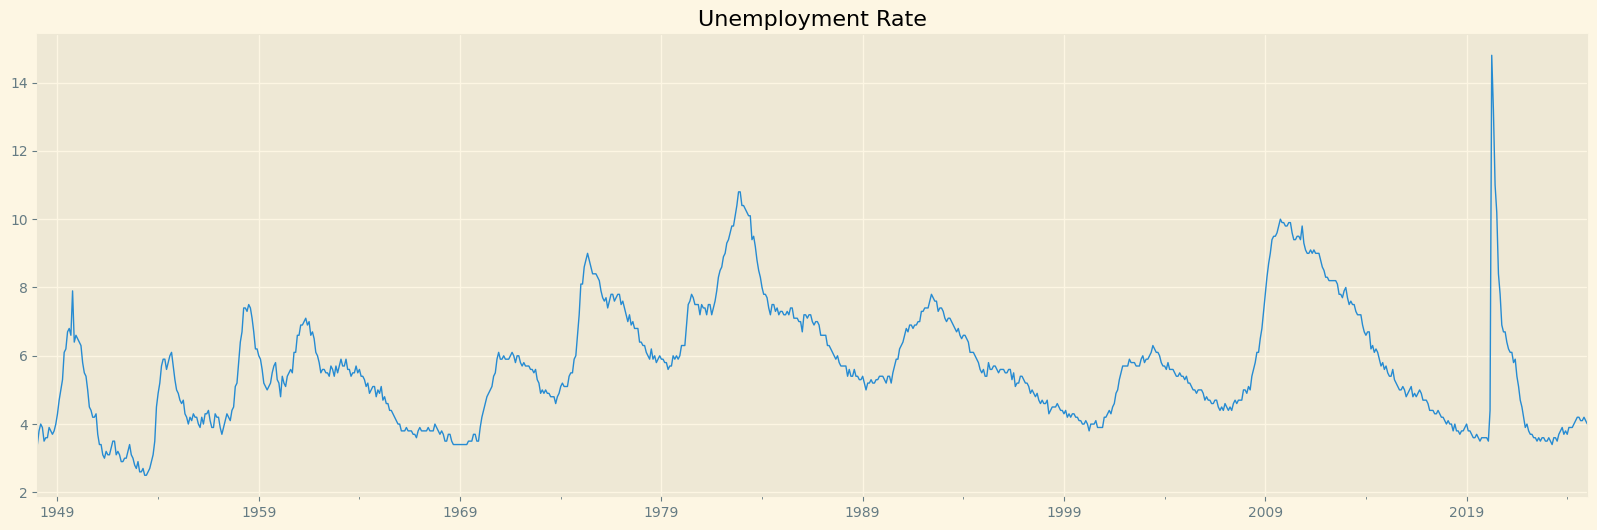

In [44]:
unemp_results = fred.search('unemployment')

unemp_results.head(10)

unrate = fred.get_series('UNRATE') 

unrate.plot(figsize = (20,6), title = 'Unemployment Rate', lw = 1)


In [59]:
unemp_df = fred.search('Unemployment State', filter=('frequency', 'Monthly'))

unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

unemp_df


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-02-18,2025-02-18,Unemployment Rate,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:47:42-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-02-18,2025-02-18,Unemployment Rate - Black or African American,1972-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:37-06:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2025-02-18,2025-02-18,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:47:48-06:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2025-02-18,2025-02-18,Unemployment Rate in California,1976-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-29 08:59:02-06:00,64,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2025-02-18,2025-02-18,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000150,LNS14000150,2025-02-18,2025-02-18,Unemployment Rate - Married Men,1955-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:36-06:00,5,The series comes from the 'Current Population ...
LNS13023570,LNS13023570,2025-02-18,2025-02-18,New Entrants as a Percent of Total Unemployed,1967-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:43-06:00,4,The series comes from the 'Current Population ...
M08320USM156SNBR,M08320USM156SNBR,2025-02-18,2025-02-18,"Unemployment Rate, Per Cent of Persons Unemplo...",1948-01-01,1969-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:51-05:00,4,These Figures Represent The Number Of Persons ...


In [ ]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-02-18,2025-02-18,Unemployment Rate,1948-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:47:42-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-02-18,2025-02-18,Unemployment Rate - Black or African American,1972-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:37-06:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2025-02-18,2025-02-18,Unemployment Rate in California,1976-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-29 08:59:02-06:00,64,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2025-02-18,2025-02-18,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
TXUR,TXUR,2025-02-18,2025-02-18,Unemployment Rate in Texas,1976-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-29 08:58:03-06:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M08311USM156SNBR,M08311USM156SNBR,2025-02-18,2025-02-18,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...
LNS14000150,LNS14000150,2025-02-18,2025-02-18,Unemployment Rate - Married Men,1955-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-02-07 07:48:36-06:00,5,The series comes from the 'Current Population ...
M08320USM156SNBR,M08320USM156SNBR,2025-02-18,2025-02-18,"Unemployment Rate, Per Cent of Persons Unemplo...",1948-01-01,1969-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:51-05:00,4,These Figures Represent The Number Of Persons ...


In [79]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)



In [ ]:
all_results 

In [74]:
unemp_results = pd.concat(all_results, axis = 1)

In [81]:
unemp_states = unemp_results.drop('UNRATE', axis = 1)

<Axes: title={'center': 'Missing Values in Unemployment Data'}>

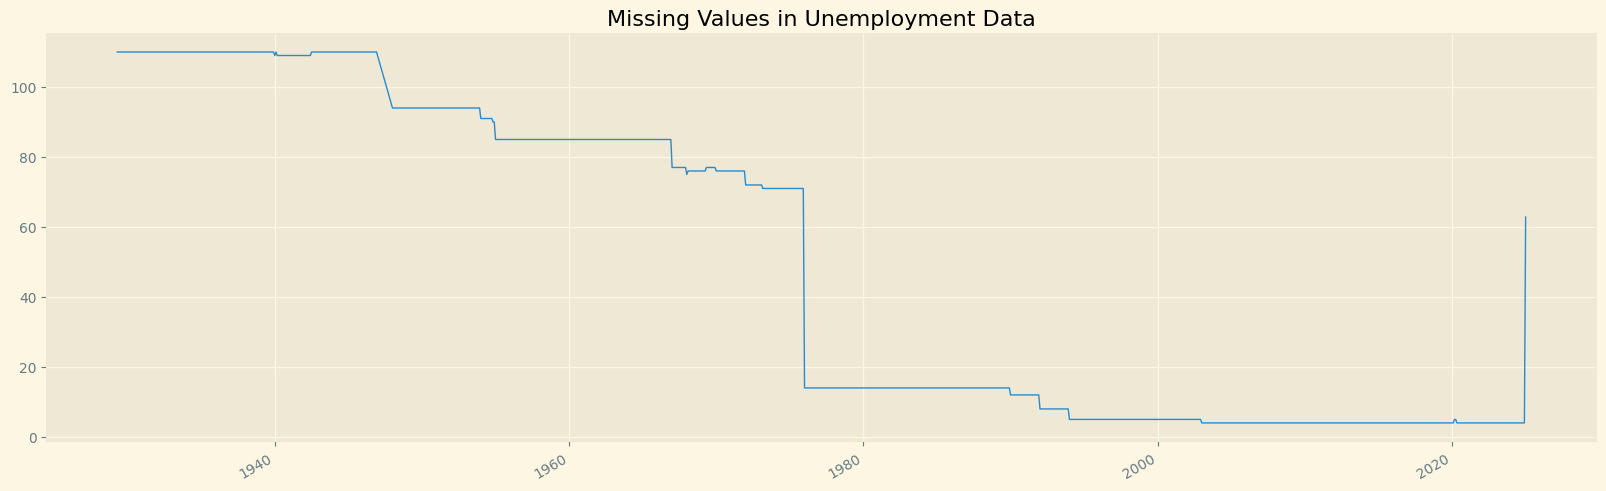

In [83]:
unemp_states.isna().sum(axis = 1).plot(figsize = (20,6), title = 'Missing Values in Unemployment Data', lw = 1)

<Axes: title={'center': 'Missing Values in Unemployment Data'}>

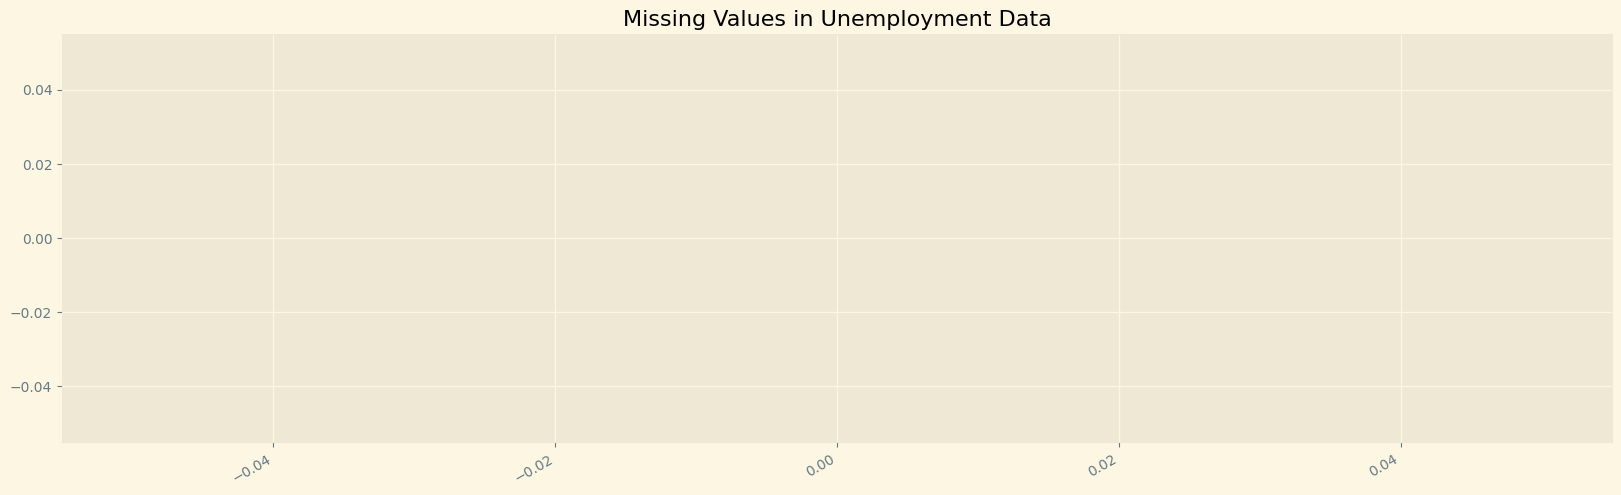

In [ ]:
unemp_states.isna().sum(axis = 1).plot(figsize = (20,6), title = 'Missing Values in Unemployment Data', lw = 1)